<a href="https://colab.research.google.com/github/JuanCruzArese/TP-Final-ICD/blob/laburen-aca/TP_Final_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clonar repositorio desde GitHub

In [46]:
!git clone https://github.com/JuanCruzArese/TP-Final-ICD
%cd TP-Final-ICD

Cloning into 'TP-Final-ICD'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 53 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 1.95 MiB | 6.39 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/TP-Final-ICD/TP-Final-ICD


## Importar librerias

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression # Regresión logística
from sklearn.ensemble import RandomForestClassifier # Random forest
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from imblearn.over_sampling import RandomOverSampler

## Leer dataset

In [48]:
df = pd.read_csv('/content/TP-Final-ICD/UCI_Credit_Card_TF.csv')

# **Exploración y análisis del dataset**

### Le hechamos un vistazo al dataset

In [49]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Informacion de las columnas del dataframe (tipo de dato, entradas no nulas, etc.)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29100 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Información estadística del dataframe

In [51]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29100.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,28500.000000,2.700000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.489141,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5703.194491,5.975542e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217052,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16691.187697,2.368334e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.100000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2106.500000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5018.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Dimensiones del dataframe (filas, columnas)

In [52]:
print(df.shape)

(30000, 25)


### Cantidad de clientes de tarjetas de crédito

In [53]:
print(len(df))

30000


### Cantidad de clientes que cumplieron con el pago

In [54]:
print(len(df[df['default.payment.next.month'] == 0]))

23364


### Cantidad de clientes que no cumplieron con el pago

In [55]:
print(len(df[df['default.payment.next.month'] == 1]))

6636


Como se puede observar, hay un claro sesgo en las entradas del dataset; más adelante veremos como solucionarlo.

### Porcentaje de clientes que cumplieron con el pago

In [56]:
def get_percentage(default_payment):
  return len(df[df['default.payment.next.month'] == default_payment]) * 100 / len(df)

print(get_percentage(0))

77.88


### Porcentaje de clientes que no cumplieron con el pago

In [57]:
print(get_percentage(1))

22.12


## Diagrama de caja

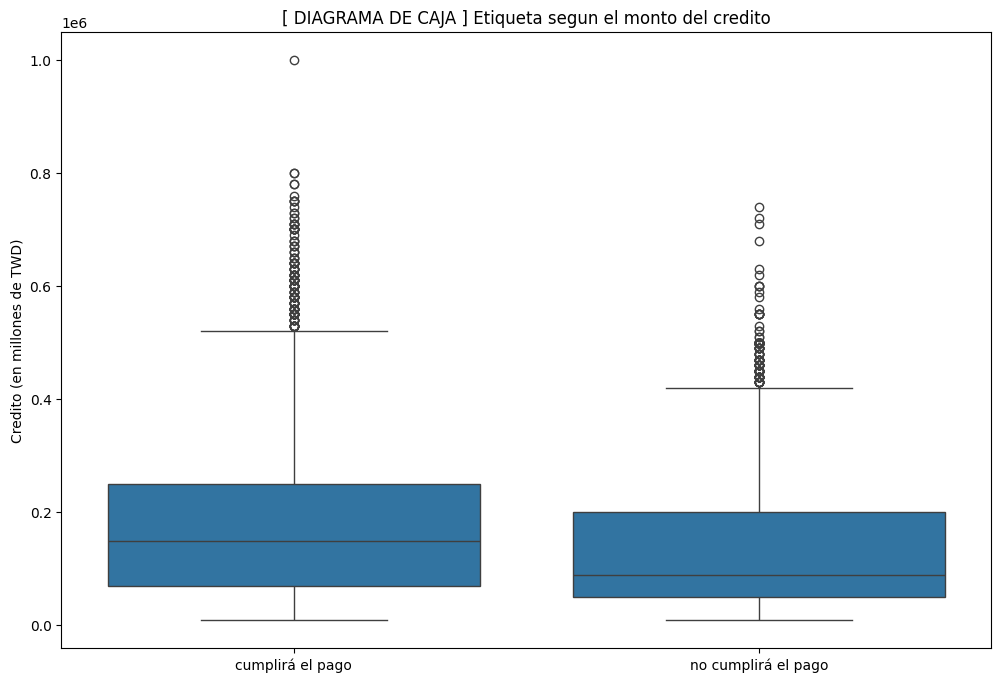

In [58]:
def plot(plot, x, y, title, ylabel):
  plt.figure(figsize=(12, 8))

  match plot:
    case 'box':
      sns.boxplot(data=df, x=x, y=y)
    case 'violin':
      sns.violinplot(data=df, x=x, y=y)

  plt.title(title)
  plt.xlabel('')
  plt.xticks([0, 1], ['cumplirá el pago', 'no cumplirá el pago'])
  plt.ylabel(ylabel)
  plt.show()

plot('box', 'default.payment.next.month', 'LIMIT_BAL',
     '[ DIAGRAMA DE CAJA ] Etiqueta segun el monto del credito',
     'Credito (en millones de TWD)')

## Gráfico de violín

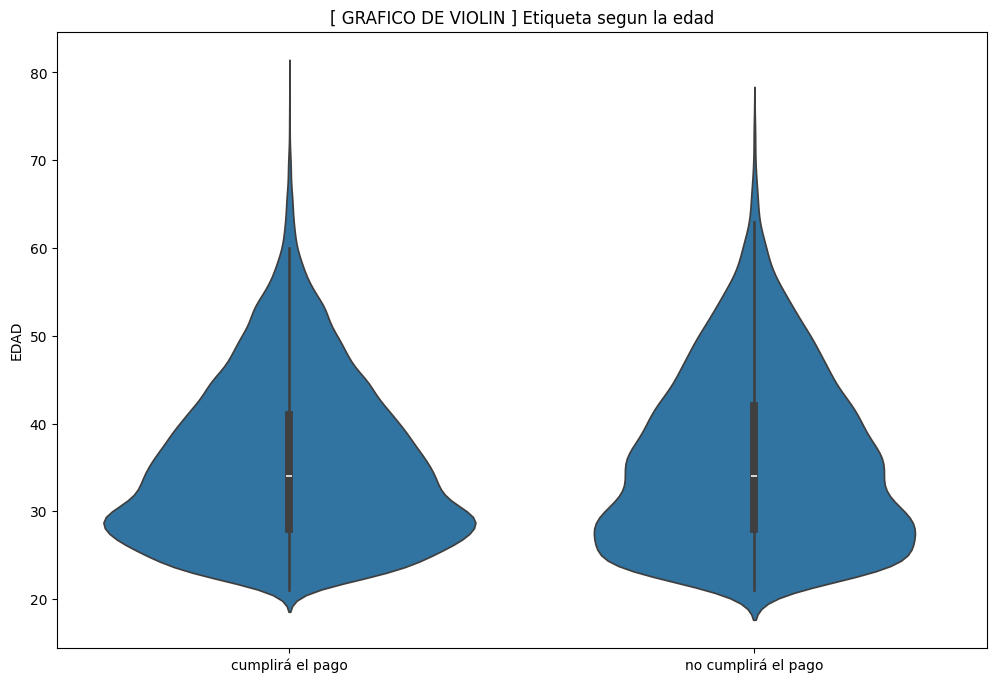

In [59]:
plot('violin', 'default.payment.next.month', 'AGE',
     '[ GRAFICO DE VIOLIN ] Etiqueta segun la edad',
     'EDAD')

# **Limpieza y preparación de los datos**

### Valores nulos por columna en el dataset

In [60]:
print(df.isnull().sum())

ID                               0
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                            900
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                      1500
PAY_AMT2                      3000
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default.payment.next.month       0
dtype: int64


## Manejo de valores nulos

### Análisis de la columna AGE

Media de la columna

In [61]:
df['AGE'].mean()

np.float64(35.48914089347079)

Mediana de la columna

In [62]:
df['AGE'].median()

34.0

Histograma de la columna

<Axes: >

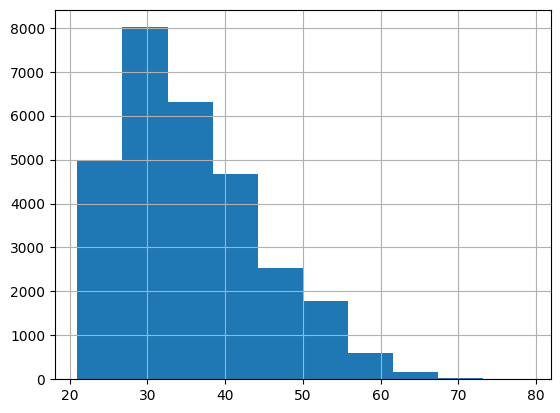

In [63]:
df['AGE'].hist()

Porcentaje del dataframe que representan las filas con valores nulos

In [64]:
print(len(df[df['AGE'].isna()]) / len(df) * 100)

3.0


Ya que la media (35.48) y la mediana (34.0) tienen valores muy similares, podemos hacer el remplazo de los valores nulos por la media. Se podrían, tambien, haber borrado esas filas ya que representan solo el 3% del dataset.

In [65]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

### Análisis de la columna PAY_AMT1

Media de la columna

In [66]:
df['PAY_AMT1'].mean()

np.float64(5703.194491228071)

Mediana de la columna

In [67]:
df['PAY_AMT1'].median()

2106.5

Histograma de la columna

<Axes: >

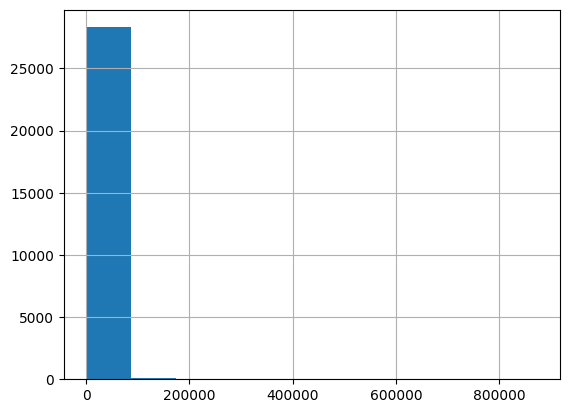

In [68]:
df['PAY_AMT1'].hist()

Porcentaje del dataframe que representan las filas con valores nulos

In [69]:
print(len(df[df['PAY_AMT1'].isna()]) / len(df) * 100)

5.0


Debido a que la media y la mediana no se asemejan lo suficiente, además de que el histograma no nos brinda información útil, la mejor opción es eliminar estas filas, las cuales representan el 5% del dataset.

In [70]:
df["PAY_AMT1"] = df["PAY_AMT1"].dropna()

### Análisis de la columna PAY_AMT3

Media de la columna

In [71]:
df['PAY_AMT2'].mean()

np.float64(5975.54237037037)

Mediana de la columna

In [72]:
df['PAY_AMT2'].median()

2009.0

Histograma de la columna

<Axes: >

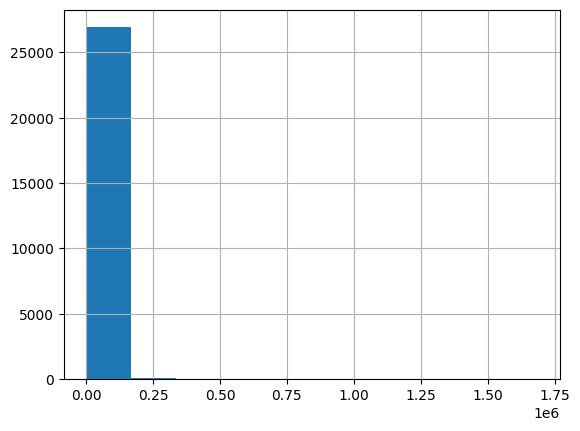

In [73]:
df['PAY_AMT2'].hist()

Porcentaje del dataframe que representan las filas con valores nulos:

In [74]:
print(len(df[df['PAY_AMT2'].isna()]) / len(df) * 100)

10.0


Nuevamente en esta situación, no es correcto hacer el reemplazo, por ende, procedemos a eliminar todas las filas que contengan valores nulos, representando el 10% del dataset.

In [75]:
df["PAY_AMT2"] = df["PAY_AMT2"].dropna()

## Outliers

In [76]:
def get_outliers(column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  iqr = q3 - q1

  lower_end = q1 - 1.5 * iqr
  upper_end = q3 + 1.5 * iqr

  return len(df[(df[column] < lower_end) | (df[column] > upper_end)])

data = {'column': [], 'outliers': [], 'outliers_percentage': []}

for column in df.columns[:-1]:
  outliers = get_outliers(column)

  data['column'].append(column)
  data['outliers'].append(outliers)
  data['outliers_percentage'].append(outliers / len(df) * 100)

outliers = pd.DataFrame(data)
outliers = outliers.sort_values('outliers_percentage', ascending=False)
outliers = outliers.reset_index(drop=True)

print(outliers.to_markdown(index=False))

| column    |   outliers |   outliers_percentage |
|:----------|-----------:|----------------------:|
| PAY_2     |       4410 |             14.7      |
| PAY_3     |       4209 |             14.03     |
| PAY_4     |       3508 |             11.6933   |
| PAY_0     |       3130 |             10.4333   |
| PAY_6     |       3079 |             10.2633   |
| PAY_AMT4  |       2994 |              9.98     |
| PAY_5     |       2968 |              9.89333  |
| PAY_AMT6  |       2958 |              9.86     |
| PAY_AMT5  |       2945 |              9.81667  |
| BILL_AMT5 |       2725 |              9.08333  |
| BILL_AMT6 |       2693 |              8.97667  |
| BILL_AMT4 |       2622 |              8.74     |
| PAY_AMT1  |       2617 |              8.72333  |
| PAY_AMT3  |       2598 |              8.66     |
| BILL_AMT3 |       2469 |              8.23     |
| PAY_AMT2  |       2460 |              8.2      |
| BILL_AMT1 |       2400 |              8        |
| BILL_AMT2 |       2395 |     

## Mapa de calor

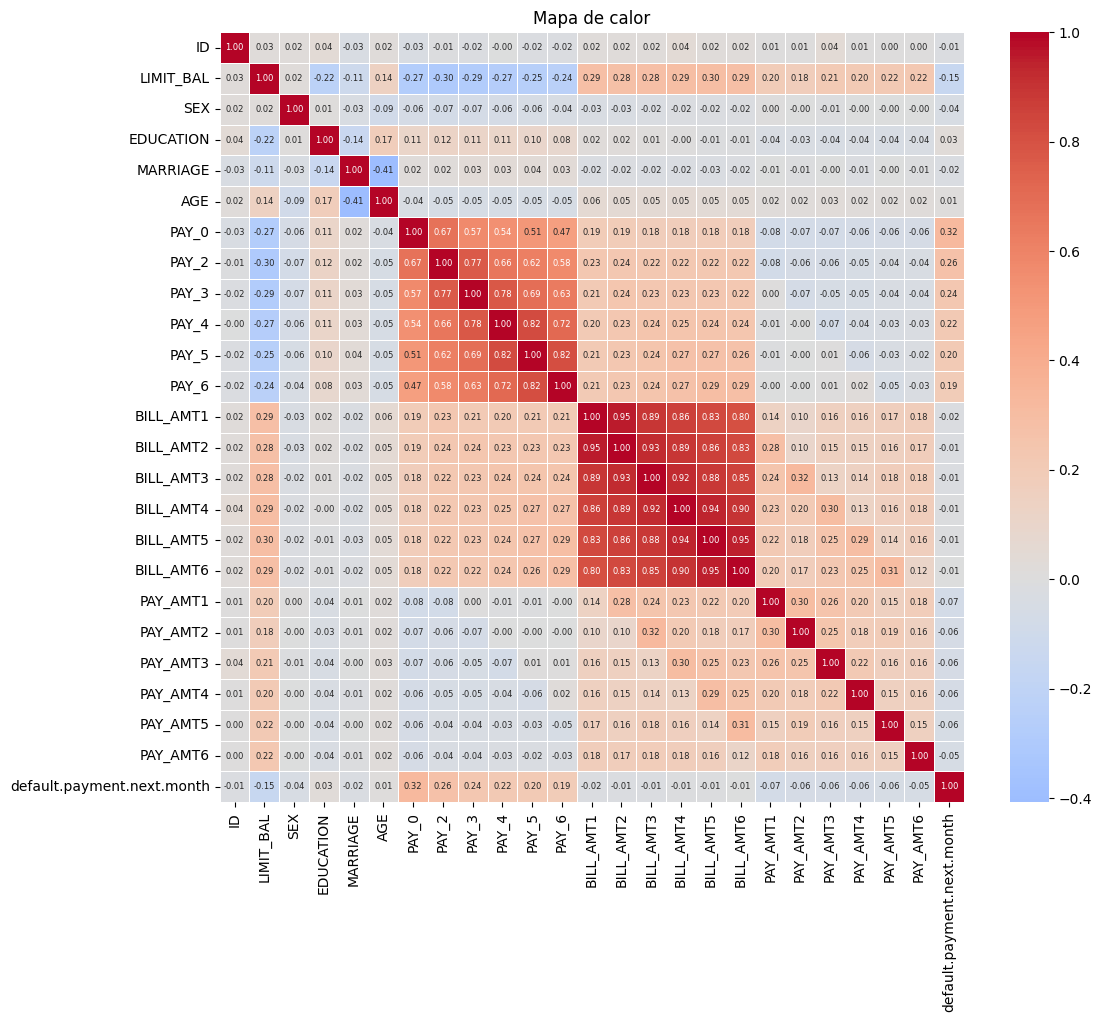

In [77]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    annot=True,
    annot_kws={'size': 6},
    linewidths=0.5
)

plt.title('Mapa de calor')
plt.show()

## Eliminamos una columna innecesaria

In [78]:
df = df.drop('ID', axis=1)

## Separar columnas de la etiqueta

In [79]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

## Oversampling

In [80]:
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y)

### Debido al sesgo de las etiquetas (23364 vs 6636), hay que usar una tecnica llamada oversampling, que se encarga de crear entradas nuevas de la etiqueta minoritaria para evitar un desbalance

## Separar dataframe

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Escalar valores numericos

In [82]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Modelos

## Random forest

### Inicialización del modelo

In [83]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluación del modelo

In [84]:
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_precision = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_f1_score = f1_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      4664
           1       0.91      0.97      0.94      4682

    accuracy                           0.94      9346
   macro avg       0.94      0.94      0.94      9346
weighted avg       0.94      0.94      0.94      9346



### Matriz de confusión

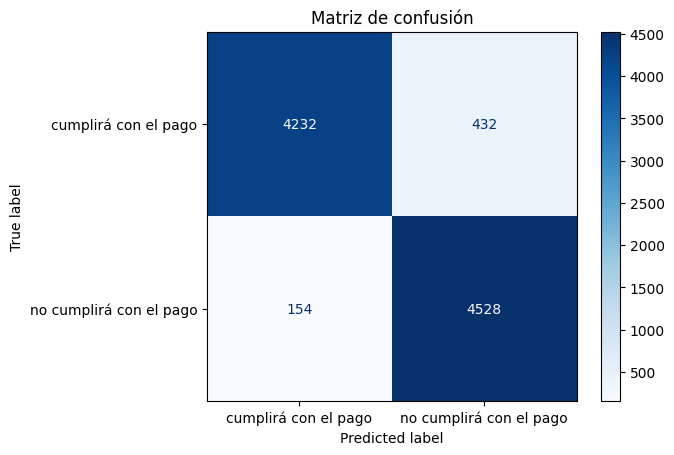

In [85]:
confussion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confussion_matrix, display_labels=['cumplirá con el pago', 'no cumplirá con el pago'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

## Arbol de decisión

### Inicialización del modelo

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluación del modelo

In [87]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_precision = precision_score(y_test, y_pred)
decision_tree_recall = recall_score(y_test, y_pred)
decision_tree_f1_score = f1_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4664
           1       0.83      0.97      0.89      4682

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346



### Matriz de confusión

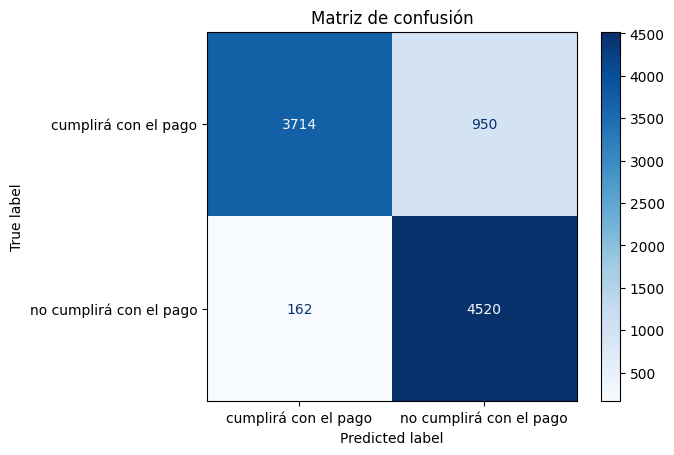

In [88]:
confussion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confussion_matrix, display_labels=['cumplirá con el pago', 'no cumplirá con el pago'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

# **Visualización de resultados**

In [89]:
performance = pd.DataFrame(
    {
      'model': ['Random forest', 'Decision tree'],
      'accuracy': [random_forest_accuracy, decision_tree_accuracy],
      'precision': [random_forest_precision, decision_tree_precision],
      'recall': [random_forest_recall, decision_tree_recall],
      'f1 score': [random_forest_f1_score, decision_tree_f1_score]
    }
)

print(performance.to_markdown(index=False))

| model         |   accuracy |   precision |   recall |   f1 score |
|:--------------|-----------:|------------:|---------:|-----------:|
| Random forest |   0.937299 |    0.912903 | 0.967108 |   0.939224 |
| Decision tree |   0.881019 |    0.826325 | 0.965399 |   0.890465 |


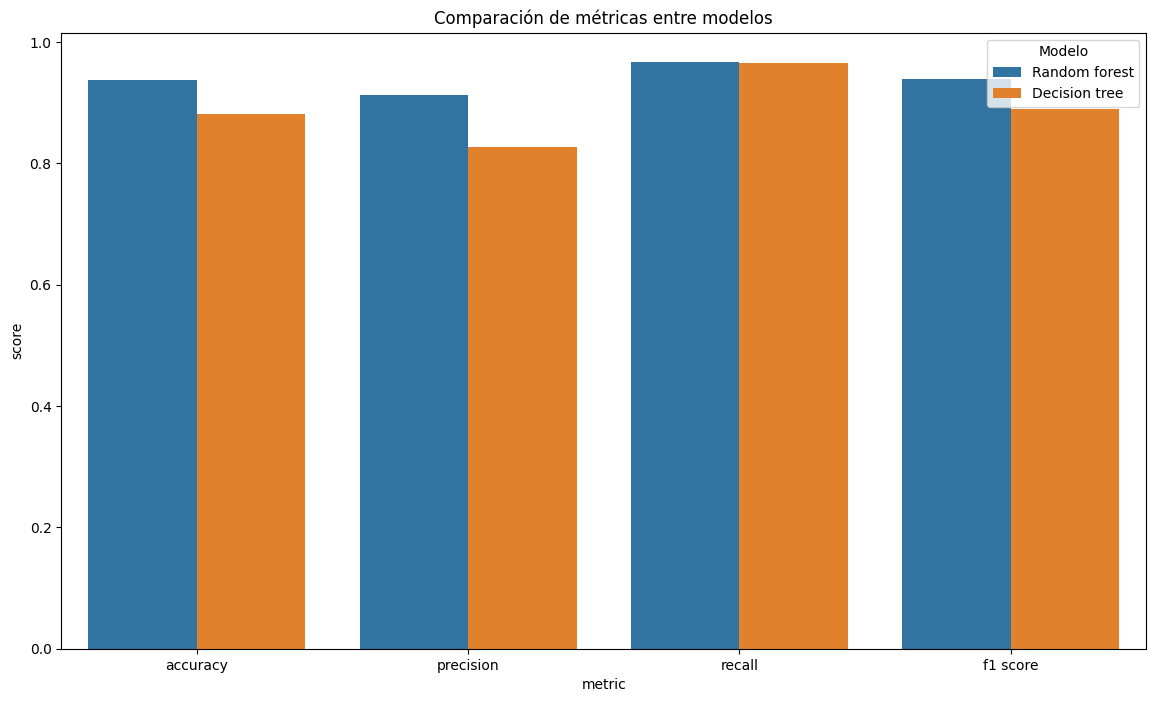

In [90]:
performance = performance.melt(id_vars='model', var_name='metric', value_name='score')

plt.figure(figsize=(14, 8))
sns.barplot(x='metric', y='score', hue='model', data=performance)
plt.title('Comparación de métricas entre modelos')
plt.legend(title='Modelo')
plt.show()